In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [71]:
# Device config
device = ("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using {device} device")

Using mps device


In [78]:
# Hyper Parameter
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
lr = 0.001

In [79]:
# Importing dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [80]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [81]:
features, labels = next(iter(train_loader))

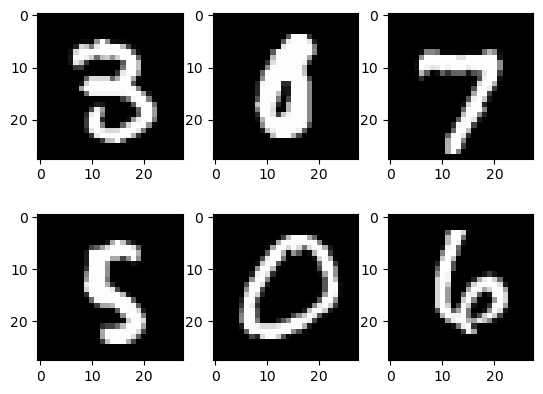

In [82]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(features[i][0], cmap='grey')

In [83]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        

    def forward(self, x):
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out

model = NeuralNetwork(input_size, hidden_size, num_classes).to(device)

In [84]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [85]:
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images,lables) in enumerate(train_loader):
        images = images.reshape(-1,28*28).to(device)
        lables = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, lables)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Steps: {i+1}/{n_total_steps}")

epoch: 1/10, Loss: 2.2808, Steps: 100/600
epoch: 1/10, Loss: 2.2975, Steps: 200/600
epoch: 1/10, Loss: 2.2734, Steps: 300/600
epoch: 1/10, Loss: 2.2918, Steps: 400/600
epoch: 1/10, Loss: 2.2820, Steps: 500/600
epoch: 1/10, Loss: 2.2839, Steps: 600/600
epoch: 2/10, Loss: 2.2737, Steps: 100/600
epoch: 2/10, Loss: 2.2815, Steps: 200/600
epoch: 2/10, Loss: 2.2828, Steps: 300/600
epoch: 2/10, Loss: 2.2768, Steps: 400/600
epoch: 2/10, Loss: 2.2826, Steps: 500/600
epoch: 2/10, Loss: 2.2763, Steps: 600/600
epoch: 3/10, Loss: 2.2776, Steps: 100/600
epoch: 3/10, Loss: 2.2815, Steps: 200/600
epoch: 3/10, Loss: 2.2780, Steps: 300/600
epoch: 3/10, Loss: 2.2787, Steps: 400/600
epoch: 3/10, Loss: 2.2748, Steps: 500/600
epoch: 3/10, Loss: 2.2731, Steps: 600/600
epoch: 4/10, Loss: 2.2730, Steps: 100/600
epoch: 4/10, Loss: 2.2824, Steps: 200/600
epoch: 4/10, Loss: 2.2794, Steps: 300/600
epoch: 4/10, Loss: 2.2761, Steps: 400/600
epoch: 4/10, Loss: 2.2809, Steps: 500/600
epoch: 4/10, Loss: 2.2804, Steps: 

In [86]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0

    for images, lables in test_loader:
        images = images.reshape(-1,28*28).to(device)
        labels = lables.to(device)

        outputs = model(images)
        _, prediction = torch.max(outputs,1)
        n_samples += labels.shape[0]
        n_correct += (prediction == labels).sum().item()

    acc = 100.0 * (n_correct/n_samples)
    print(f"Accuracy: {acc}%")
        

Accuracy: 10.09%
